<a href="https://colab.research.google.com/github/preto-fisico/Dupla55-Ciencia_de_Dados/blob/main/PROJETO_UNIDADE10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 - Ponto de partida - Utilização da API do Kaggle para extração  das imagens do Dataset.**

In [ ]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 98% 111M/113M [00:03<00:00, 40.3MB/s]
100% 113M/113M [00:03<00:00, 31.9MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['m-014-01.jpg', 'm-074-01.jpg', 'm1-024-01.jpg', 'f1-002-01.jpg', 'f-014-01.jpg', 'm-026-01.jpg', 'm1-033-01.jpg', 'm-054-01.jpg', 'm1-009-01.jpg', 'f-012-01.jpg', 'm-084-01.jpg', 'f-032-01.jpg', 'm-059-01.jpg', 'm-067-01.jpg', 'f-042-01.jpg', 'm-039-01.jpg', 'f-043-01.jpg', 'm-061-01.jpg', 'm1-038-01.jpg', 'm-013-01.jpg', 'f-022-01.jpg', 'm1-020-01.jpg', 'f1-009-01.jpg', 'm-047-01.jpg', 'm1-032-01.jpg', 'f-020-01.jpg', 'm1-005-01.jpg', 'f-040-01.jpg', 'm1-040-01.jpg', 'f-023-01.jpg', 'm-016-01.jpg', 'm1-031-01.jpg', 'm-075-01.jpg', 'm-055-01.jpg', 'm-090-01.jpg', 'm-053-01.jpg', 'm-009-01.jpg', 'f-027-01.jpg', 'm1-011-01.jpg', 'm1-002-01.jpg', 'm-093-01.jpg', 'm-050-01.jpg', 'm1-029-01.jpg', 'f1-004-01.jpg', 'f1-003-01.jpg', 'f-008-01.jpg', 'm-096-01.jpg', 'f1-011-01.jpg', 'm-030-01.jpg', 'm-017-01.jpg', 'f1-015-01.jpg', 'm-043-01.jpg', 'm1-035-01.jpg', 'm1-007-01.jpg', 'f1-001-01.jpg', 'm-056-01.jpg', 'm-100-01.jpg', 'f-036-01.jpg', 'm1-034-01.jpg', 'f-015-01.jpg', 'm1-022-01.jpg', 

**1 - Organização do Dataset para rotulagem e organização dos dados**

In [ ]:
import os
import pandas as pd
import shutil
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminhos principais
project_folder = "/content/drive/My Drive/projeto_unidade10"
dataset_folder = os.path.join(project_folder, "dataset")
photos_folder = os.path.join(dataset_folder, "photos")
annotations_path = os.path.join(project_folder, "annotations.csv")
train_folder = os.path.join(dataset_folder, "train")
val_folder = os.path.join(dataset_folder, "val")
test_folder = os.path.join(dataset_folder, "test")

# Criar a estrutura de pastas
os.makedirs(os.path.join(train_folder, "0"), exist_ok=True)
os.makedirs(os.path.join(train_folder, "1"), exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Carregar anotações
annotations = pd.read_csv(annotations_path)
labeled_images = {row["filename"]: row["label"] for _, row in annotations.iterrows()}

# Listar todas as imagens na pasta photos
all_images = os.listdir(photos_folder)

# Separar imagens rotuladas e não rotuladas
labeled = [img for img in all_images if img in labeled_images]
unlabeled = [img for img in all_images if img not in labeled_images]

# Divisão de imagens
num_total = len(all_images)
num_train = len(labeled)
num_val = int(0.3 * num_total)
num_test = num_total - num_train - num_val

train_labeled = labeled
val_labeled = labeled[:num_val]
val_unlabeled = unlabeled[:num_val - len(val_labeled)]
test_labeled = labeled[num_val:num_val + num_test]
test_unlabeled = unlabeled[num_val - len(val_labeled):num_val - len(val_labeled) + num_test]

# Mover imagens para as pastas
for img in train_labeled:
    label = str(labeled_images[img])  # Converter label para string
    shutil.copy(os.path.join(photos_folder, img), os.path.join(train_folder, label, img))

for img in val_labeled + val_unlabeled:
    shutil.copy(os.path.join(photos_folder, img), os.path.join(val_folder, img))

for img in test_labeled + test_unlabeled:
    shutil.copy(os.path.join(photos_folder, img), os.path.join(test_folder, img))

print("Imagens organizadas com sucesso!")





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imagens organizadas com sucesso!
Imagens rotuladas encontradas na pasta 'val': ['f1-011-01.jpg', 'f1-005-01.jpg', 'f1-002-01.jpg', 'f1-009-01.jpg', 'f1-008-01.jpg', 'm-009-01.jpg', 'f-012-01.jpg', 'f-011-01.jpg', 'f-013-01.jpg', 'f-005-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-022-01.jpg', 'm-099-01.jpg', 'm-018-01.jpg', 'm-066-01.jpg', 'm-083-01.jpg', 'm-088-01.jpg', 'm-078-01.jpg', 'm1-033-01.jpg', 'f-018-01.jpg', 'm-014-01.jpg', 'f1-014-01.jpg', 'm1-008-01.jpg', 'm-030-01.jpg', 'm-040-01.jpg', 'f-025-01.jpg', 'm-092-01.jpg', 'm-055-01.jpg', 'm-052-01.jpg', 'm-065-01.jpg', 'm1-019-01.jpg', 'm-021-01.jpg', 'f-021-01.jpg', 'm-035-01.jpg', 'm1-023-01.jpg', 'f-037-01.jpg', 'm1-035-01.jpg', 'm-086-01.jpg', 'm-011-01.jpg', 'm1-016-01.jpg', 'f-022-01.jpg', 'm-095-01.jpg', 'm1-015-01.jpg', 'm1-025-01.jpg', 'm-063-01.jpg', 'm-077-01.jpg', 'm-045-01.jpg', 'f-019-0

Organização  das pastas Train, Val  e Test

**1 - Organizar os conjuntos pré-processamento**

In [13]:
import os
import random
import shutil
from PIL import Image
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminhos no Google Drive
project_folder = "/content/drive/My Drive/projeto_unidade10/"
photos_folder = os.path.join(project_folder, "dataset/photos")
dataset_dirs = {
    "train": os.path.join(project_folder, "dataset/train"),
    "val": os.path.join(project_folder, "dataset/val"),
    "test": os.path.join(project_folder, "dataset/test")
}

# Configurar a seed para replicabilidade
random.seed(23)

# Criar as pastas necessárias
for key, path in dataset_dirs.items():
    if os.path.exists(path):
        shutil.rmtree(path)  # Apagar conteúdo antigo
    os.makedirs(path, exist_ok=True)

# Função de pré-processamento
def preprocess_images_with_aspect_ratio(input_folder, output_folder, target_size=(250, 200)):
    """
    Redimensiona as imagens para o tamanho especificado sem distorcer a proporção,
    adicionando padding para manter o tamanho final uniforme.
    """
    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        if not file_name.endswith(('.jpg', '.png')):
            continue
        try:
            # Abrir a imagem
            img = Image.open(input_path)

            # Redimensionar a imagem mantendo a proporção
            img.thumbnail(target_size)  # Ajusta a imagem para caber dentro do tamanho máximo

            # Criar uma nova imagem com o tamanho exato e um fundo preto
            new_img = Image.new("RGB", target_size, (0, 0, 0))  # Fundo preto
            offset = ((target_size[0] - img.size[0]) // 2, (target_size[1] - img.size[1]) // 2)
            new_img.paste(img, offset)  # Centraliza a imagem redimensionada no fundo

            # Salvar a imagem processada
            output_path = os.path.join(output_folder, file_name)
            new_img.save(output_path)

        except Exception as e:
            print(f"Erro ao processar {file_name}: {e}")

# Função para dividir o dataset
def split_dataset(source_folder, output_dirs, ratios=(0.5, 0.3, 0.2)):
    """
    Divide o dataset em treino, validação e teste nas proporções especificadas.
    """
    all_files = [f for f in os.listdir(source_folder) if f.endswith(('.jpg', '.png'))]
    random.shuffle(all_files)

    num_train = int(len(all_files) * ratios[0])
    num_val = int(len(all_files) * ratios[1])

    train_files = all_files[:num_train]
    val_files = all_files[num_train:num_train + num_val]
    test_files = all_files[num_train + num_val:]

    # Limpar diretórios e copiar arquivos
    for files, dest_dir in zip([train_files, val_files, test_files], output_dirs.values()):
        if os.path.exists(dest_dir):
            shutil.rmtree(dest_dir)  # Apagar conteúdo antigo
        os.makedirs(dest_dir, exist_ok=True)  # Recriar diretório
        for file in files:
            shutil.copy(os.path.join(source_folder, file), dest_dir)

    print(f"Divisão concluída:")
    print(f"- Treino: {len(train_files)} imagens.")
    print(f"- Validação: {len(val_files)} imagens.")
    print(f"- Teste: {len(test_files)} imagens.")

    return train_files, val_files, test_files

# Dividir o dataset e preparar as pastas
if os.path.exists(photos_folder):
    train_files, val_files, test_files = split_dataset(
        photos_folder, dataset_dirs, ratios=(0.5, 0.3, 0.2)
    )

    # Processar as imagens em cada conjunto
    for key, folder in dataset_dirs.items():
        print(f"Processando imagens para o conjunto: {key}")
        preprocess_images_with_aspect_ratio(folder, folder)

    print("Imagens organizadas e processadas com sucesso.")
else:
    print(f"Erro: A pasta {photos_folder} não existe. Verifique o caminho.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Divisão concluída:
- Treino: 94 imagens.
- Validação: 56 imagens.
- Teste: 38 imagens.
Processando imagens para o conjunto: train
Processando imagens para o conjunto: val
Processando imagens para o conjunto: test
Imagens organizadas e processadas com sucesso.


**Rotular o conjunto de treinamento**

In [16]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import shutil

# Caminhos no Google Drive
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "train": os.path.join(project_folder, "dataset/train")
}
annotation_file = os.path.join(project_folder, "annotations_train.csv")

# Função para exibir barra de progresso e rotular o conjunto de treinamento
def annotate_train_images(folder, output_csv):
    """
    Rotula imagens no conjunto de treinamento e move os arquivos para subpastas '0' e '1'.
    """
    files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png'))]
    annotations = []

    # Criar barra de progresso
    progress = widgets.IntProgress(value=0, max=len(files), description="Progresso:")
    progress_label = widgets.Label(value=f"0/{len(files)} imagens processadas.")
    display(progress, progress_label)

    # Função para exibir próxima imagem e processar rótulo
    def show_next(index):
        if index >= len(files):
            # Salvar anotações ao final
            with open(output_csv, 'w') as f:
                f.write("filename,label\n")
                f.write("\n".join(annotations))
            print(f"Anotações salvas em {output_csv}.")
            print("Rotulamento concluído!")
            return

        file_path = os.path.join(folder, files[index])
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        label_input = widgets.Text(
            description="Rótulo:",
            placeholder="Digite 0 (Homem) ou 1 (Mulher)",
            layout=widgets.Layout(width="300px")  # Ajusta largura do campo de entrada
        )

        def on_submit(change):
            label = label_input.value.strip()
            if label in ['0', '1']:
                annotations.append(f"{files[index]},{label}")
                dest_dir = os.path.join(folder, label)  # Subpasta "0" ou "1"
                os.makedirs(dest_dir, exist_ok=True)
                shutil.move(file_path, os.path.join(dest_dir, files[index]))

                progress.value += 1
                progress_label.value = f"{progress.value}/{len(files)} imagens processadas."
                clear_output(wait=True)
                display(progress, progress_label)
                show_next(index + 1)
            else:
                print("Entrada inválida. Digite 0 ou 1.")

        label_input.on_submit(on_submit)
        display(label_input)

    show_next(0)

# Iniciar rotulagem para o conjunto de treinamento
train_folder = dataset_dirs["train"]
if os.path.exists(train_folder):
    print("Iniciando o rotulamento para o conjunto de treinamento...")
    annotate_train_images(train_folder, annotation_file)
else:
    print(f"Erro: A pasta {train_folder} não existe. Verifique o caminho.")


IntProgress(value=94, description='Progresso:', max=94)

Label(value='94/94 imagens processadas.')

Anotações salvas em /content/drive/My Drive/projeto_unidade10/annotations_train.csv.
Rotulamento concluído!


**Rotular o conjunto teste**

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import shutil

# Caminhos no Google Drive
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "test": os.path.join(project_folder, "dataset/test")
}
annotation_file = os.path.join(project_folder, "annotations_test.csv")

# Função para exibir barra de progresso e rotular o conjunto de teste
def annotate_test_images(folder, output_csv):
    """
    Rotula imagens no conjunto de teste e move os arquivos para subpastas '0' e '1'.
    """
    files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png'))]
    annotations = []

    # Criar barra de progresso
    progress = widgets.IntProgress(value=0, max=len(files), description="Progresso:")
    progress_label = widgets.Label(value=f"0/{len(files)} imagens processadas.")
    display(progress, progress_label)

    # Função para exibir próxima imagem e processar rótulo
    def show_next(index):
        if index >= len(files):
            # Salvar anotações ao final
            with open(output_csv, 'w') as f:
                f.write("filename,label\n")
                f.write("\n".join(annotations))
            print(f"Anotações salvas em {output_csv}.")
            print("Rotulamento concluído!")
            return

        file_path = os.path.join(folder, files[index])
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        label_input = widgets.Text(
            description="Rótulo:",
            placeholder="Digite 0 (Homem) ou 1 (Mulher)"
        )

        def on_submit(change):
            label = label_input.value.strip()
            if label in ['0', '1']:
                annotations.append(f"{files[index]},{label}")
                dest_dir = os.path.join(folder, label)  # Subpasta "0" ou "1"
                os.makedirs(dest_dir, exist_ok=True)
                shutil.move(file_path, os.path.join(dest_dir, files[index]))

                progress.value += 1
                progress_label.value = f"{progress.value}/{len(files)} imagens processadas."
                clear_output(wait=True)
                display(progress, progress_label)
                show_next(index + 1)
            else:
                print("Entrada inválida. Digite 0 ou 1.")

        label_input.on_submit(on_submit)
        display(label_input)

    show_next(0)

# Iniciar rotulagem para o conjunto de teste
test_folder = dataset_dirs["test"]
if os.path.exists(test_folder):
    print("Iniciando o rotulamento para o conjunto de teste...")
    annotate_test_images(test_folder, annotation_file)
else:
    print(f"Erro: A pasta {test_folder} não existe. Verifique o caminho.")


IntProgress(value=38, description='Progresso:', max=38)

Label(value='38/38 imagens processadas.')

Anotações salvas em /content/drive/My Drive/projeto_unidade10/annotations_test.csv.
Rotulamento concluído!


**Rotular o conjunto validação**

In [15]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import shutil

# Caminhos no Google Drive
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "val": os.path.join(project_folder, "dataset/val")
}
annotation_file = os.path.join(project_folder, "annotations_val.csv")

# Função para exibir barra de progresso e rotular o conjunto de validação
def annotate_val_images(folder, output_csv):
    """
    Rotula imagens no conjunto de validação e move os arquivos para subpastas '0' e '1'.
    """
    files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png'))]
    annotations = []

    # Criar barra de progresso
    progress = widgets.IntProgress(value=0, max=len(files), description="Progresso:")
    progress_label = widgets.Label(value=f"0/{len(files)} imagens processadas.")
    display(progress, progress_label)

    # Função para exibir próxima imagem e processar rótulo
    def show_next(index):
        if index >= len(files):
            # Salvar anotações ao final
            with open(output_csv, 'w') as f:
                f.write("filename,label\n")
                f.write("\n".join(annotations))
            print(f"Anotações salvas em {output_csv}.")
            print("Rotulamento concluído!")
            return

        file_path = os.path.join(folder, files[index])
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        label_input = widgets.Text(
            description="Rótulo:",
            placeholder="Digite 0 (Homem) ou 1 (Mulher)",
            layout=widgets.Layout(width="300px")  # Ajusta largura do campo de entrada
        )

        def on_submit(change):
            label = label_input.value.strip()
            if label in ['0', '1']:
                annotations.append(f"{files[index]},{label}")
                dest_dir = os.path.join(folder, label)  # Subpasta "0" ou "1"
                os.makedirs(dest_dir, exist_ok=True)
                shutil.move(file_path, os.path.join(dest_dir, files[index]))

                progress.value += 1
                progress_label.value = f"{progress.value}/{len(files)} imagens processadas."
                clear_output(wait=True)
                display(progress, progress_label)
                show_next(index + 1)
            else:
                print("Entrada inválida. Digite 0 ou 1.")

        label_input.on_submit(on_submit)
        display(label_input)

    show_next(0)

# Iniciar rotulagem para o conjunto de validação
val_folder = dataset_dirs["val"]
if os.path.exists(val_folder):
    print("Iniciando o rotulamento para o conjunto de validação...")
    annotate_val_images(val_folder, annotation_file)
else:
    print(f"Erro: A pasta {val_folder} não existe. Verifique o caminho.")


IntProgress(value=56, description='Progresso:', max=56)

Label(value='56/56 imagens processadas.')

Anotações salvas em /content/drive/My Drive/projeto_unidade10/annotations_val.csv.
Rotulamento concluído!


** normalizar os valores RGB das imagens** (Pré-processamento)

In [4]:
import os
from PIL import Image
import numpy as np
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para as pastas
project_folder = "/content/drive/My Drive/projeto_unidade10/dataset/"
subdirs = ["train", "val", "test"]

# Função para normalizar uma imagem
def normalize_image(image_path):
    try:
        # Abrir a imagem
        img = Image.open(image_path).convert("RGB")
        img_array = np.array(img, dtype=np.float32) / 255.0  # Normalizar os valores RGB para [0, 1]

        # Converter de volta para a imagem
        normalized_img = Image.fromarray((img_array * 255).astype(np.uint8))
        normalized_img.save(image_path)  # Salvar a imagem normalizada no mesmo caminho

    except Exception as e:
        print(f"Erro ao processar a imagem {image_path}: {e}")

# Verificar existência e permissão das pastas
for subdir in subdirs:
    subdir_path = os.path.join(project_folder, subdir)
    for label in ["0", "1"]:
        label_path = os.path.join(subdir_path, label)

        if not os.path.exists(label_path):
            print(f"Erro: A pasta não existe: {label_path}")
            continue

        # Verificar permissões
        if not os.access(label_path, os.R_OK | os.W_OK):
            print(f"Sem permissão para acessar a pasta: {label_path}")
            continue

        # Processar as imagens na pasta
        print(f"Normalizando imagens na pasta: {label_path}")
        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            if file_name.endswith(('.jpg', '.png')):
                normalize_image(file_path)
                print(f"Imagem normalizada: {file_path}")

print("Normalização concluída.")


Mounted at /content/drive
Normalizando imagens na pasta: /content/drive/My Drive/projeto_unidade10/dataset/train/0
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-025-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-049-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-043-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-075-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-068-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-093-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-042-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m1-036-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dataset/train/0/m-036-01.jpg
Imagem normalizada: /content/drive/My Drive/projeto_unidade10/dat

**3 - Desenvolvimento da arquitetura CNN - PRIMEIRA IMPLEMENTAÇÃO**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 94 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.6104 - loss: 1.5325 - val_accuracy: 0.3571 - val_loss: 0.9614
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.4208 - loss: 0.9550 - val_accuracy: 0.6429 - val_loss: 0.6475
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.7289 - loss: 0.6168 - val_accuracy: 0.6429 - val_loss: 0.6534
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.7001 - loss: 0.6305 - val_accuracy: 0.6429 - val_loss: 0.6716
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.7001 - loss: 0.6061 - val_accuracy: 0.6429 - val_loss: 0.6736
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.7270 - loss: 0.5878
Teste - Loss: 0.6387, Accuracy: 0.6842
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 410ms/step
F

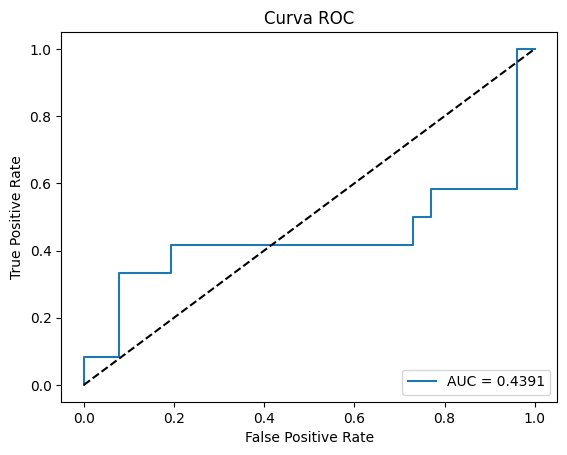

Modelo salvo em: /content/drive/My Drive/projeto_unidade10/cnn_model.h5


In [6]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Montar o Google Drive
drive.mount('/content/drive')

# Caminhos do Dataset
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "train": os.path.join(project_folder, "dataset/train"),
    "val": os.path.join(project_folder, "dataset/val"),
    "test": os.path.join(project_folder, "dataset/test")
}

# Função para configurar geradores de dados
def prepare_generators(dataset_dirs, target_size=(250, 200), batch_size=32):
    """
    Prepara os geradores para treino, validação e teste usando ImageDataGenerator.
    """
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_directory(
        dataset_dirs["train"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    val_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["val"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    test_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["test"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )

    return train_generator, val_generator, test_generator

# Criar os geradores de dados
train_generator, val_generator, test_generator = prepare_generators(dataset_dirs)

# Função para construir o modelo CNN
def build_cnn(input_shape=(250, 200, 3)):
    """
    Constrói uma CNN para classificação binária.
    """
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Criar o modelo
cnn_model = build_cnn()

# Treinar o modelo
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Previsões no conjunto de teste
y_pred_probs = cnn_model.predict(test_generator)  # Probabilidades previstas
y_pred = (y_pred_probs > 0.5).astype(int)  # Classes binárias (0 ou 1)
y_true = test_generator.classes  # Rótulos reais

# Calcular F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.4f}")

# Calcular AUC-ROC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC: {auc:.4f}")

# Plotar curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")  # Linha de referência
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Salvar o modelo treinado
model_save_path = os.path.join(project_folder, "cnn_model.h5")
cnn_model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")


**2° IMPLEMENTAÇÃO**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 94 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - accuracy: 0.5643 - loss: 0.6659 - val_accuracy: 0.6429 - val_loss: 0.6545
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - accuracy: 0.7353 - loss: 0.6215 - val_accuracy: 0.6429 - val_loss: 0.6523
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.7045 - loss: 0.6280 - val_accuracy: 0.6429 - val_loss: 0.6691
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.7275 - loss: 0.5893 - val_accuracy: 0.6429 - val_loss: 0.6664
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.6962 - loss: 0.6132 - val_accuracy: 0.6429 - val_loss: 0.6730
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - accuracy: 0.6860 - loss: 0.6309 - val_accuracy: 0.6429 - val_loss: 0.6873
Epoch 12/20
3/3 ━━━━━━━━

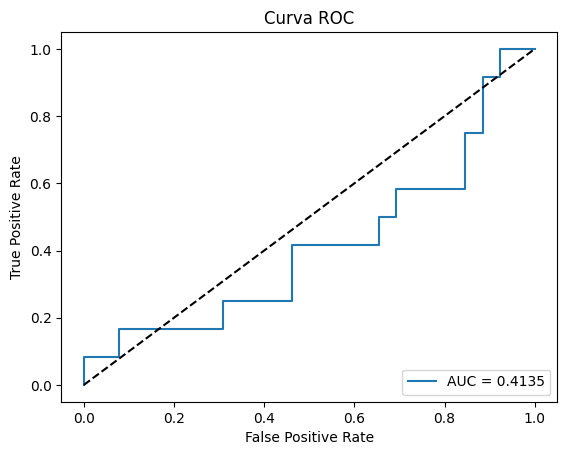

Modelo salvo em: /content/drive/My Drive/projeto_unidade10/cnn_model_v2.h5


In [7]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Montar o Google Drive
drive.mount('/content/drive')

# Caminhos do Dataset
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "train": os.path.join(project_folder, "dataset/train"),
    "val": os.path.join(project_folder, "dataset/val"),
    "test": os.path.join(project_folder, "dataset/test")
}

# Função para configurar geradores de dados
def prepare_generators(dataset_dirs, target_size=(250, 200), batch_size=32):
    """
    Prepara os geradores para treino, validação e teste usando ImageDataGenerator.
    """
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=30,  # Aumentei a rotação para mais variação
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True
    )
    val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_directory(
        dataset_dirs["train"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    val_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["val"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    test_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["test"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )

    return train_generator, val_generator, test_generator

# Criar os geradores de dados
train_generator, val_generator, test_generator = prepare_generators(dataset_dirs)

# Função para construir o modelo CNN
def build_cnn(input_shape=(250, 200, 3)):
    """
    Constrói uma CNN para classificação binária.
    """
    model = models.Sequential([
        layers.Conv2D(32, (5, 5), activation="relu", input_shape=input_shape),  # Kernel maior para capturar mais características
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation="relu"),  # Aumentei o tamanho do kernel
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu"),  # Nova camada para mais aprendizado
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),  # Aumentei a densidade da camada densa
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),  # Alterei o otimizador e ajustei a taxa de aprendizado
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Criar o modelo
cnn_model = build_cnn()

# Treinar o modelo
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Aumentei o número de épocas
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Previsões no conjunto de teste
y_pred_probs = cnn_model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = test_generator.classes

# Calcular F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.4f}")

# Calcular AUC-ROC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC: {auc:.4f}")

# Plotar curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Salvar o modelo treinado
model_save_path = os.path.join(project_folder, "cnn_model_v2.h5")
cnn_model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")


**3° IMPLEMENTAÇÃO**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 94 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 51s 16s/step - accuracy: 0.5795 - loss: 1.3439 - val_accuracy: 0.3571 - val_loss: 1.0497
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 745ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 15s/step - accuracy: 0.3945 - loss: 1.1698 - val_accuracy: 0.6429 - val_loss: 0.6512
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 15s/step - accuracy: 0.6753 - loss: 0.6574 - val_accuracy: 0.6429 - val_loss: 0.6605
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 15s/step - accuracy: 0.7173 - loss: 0.6162 - val_accuracy: 0.6429 - val_loss: 0.6736
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 15s/step - accuracy: 0.6860 - loss: 0.6359 - val_accuracy: 0.6429 - val_loss: 0.6439
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 15s/step - accur

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 636ms/step
F1-Score: 0.0000
AUC-ROC: 0.6442


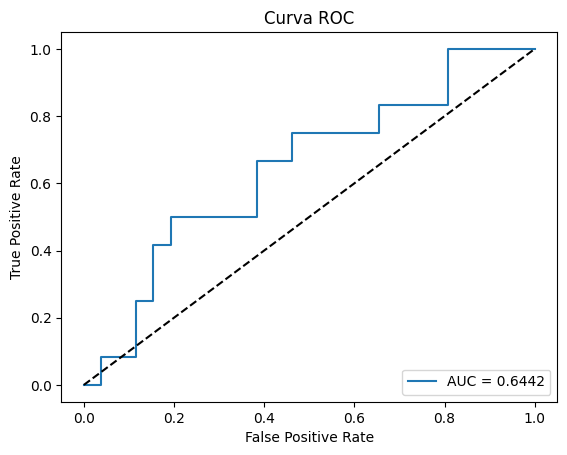

Modelo salvo em: /content/drive/My Drive/projeto_unidade10/cnn_model_optimized.h5


In [8]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Montar o Google Drive
drive.mount('/content/drive')

# Caminhos do Dataset
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "train": os.path.join(project_folder, "dataset/train"),
    "val": os.path.join(project_folder, "dataset/val"),
    "test": os.path.join(project_folder, "dataset/test")
}

# Função para configurar geradores de dados
def prepare_generators(dataset_dirs, target_size=(250, 200), batch_size=32):
    """
    Prepara os geradores para treino, validação e teste usando ImageDataGenerator.
    """
    # Aumentação de dados para o conjunto de treino
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=30,  # Aumentado para permitir maior rotação
        width_shift_range=0.3,  # Aumentado para mais variação horizontal
        height_shift_range=0.3,  # Aumentado para mais variação vertical
        shear_range=0.3,  # Maior cisalhamento
        zoom_range=0.3,  # Maior zoom
        horizontal_flip=True,
        vertical_flip=True  # Incluindo flip vertical
    )
    val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_directory(
        dataset_dirs["train"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    val_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["val"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    test_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["test"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )

    return train_generator, val_generator, test_generator

# Criar os geradores de dados
train_generator, val_generator, test_generator = prepare_generators(dataset_dirs)

# Função para construir o modelo CNN
def build_cnn(input_shape=(250, 200, 3)):
    """
    Constrói uma CNN para classificação binária.
    """
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu"),  # Adicionada camada com mais filtros
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),  # Aumentado o número de neurônios
        layers.Dropout(0.6),  # Dropout aumentado para evitar overfitting
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Learning rate reduzido
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Criar o modelo
cnn_model = build_cnn()

# Treinar o modelo
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Aumentado o número de épocas
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Previsões no conjunto de teste
y_pred_probs = cnn_model.predict(test_generator)  # Probabilidades previstas
y_pred = (y_pred_probs > 0.4).astype(int)  # Limiar reduzido para melhorar recall
y_true = test_generator.classes  # Rótulos reais

# Calcular F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.4f}")

# Calcular AUC-ROC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC: {auc:.4f}")

# Plotar curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")  # Linha de referência
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Salvar o modelo treinado
model_save_path = os.path.join(project_folder, "cnn_model_optimized.h5")
cnn_model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")


**4° IMPLEMENTAÇÃO**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Montar o Google Drive
drive.mount('/content/drive')

# Caminhos do Dataset
project_folder = "/content/drive/My Drive/projeto_unidade10/"
dataset_dirs = {
    "train": os.path.join(project_folder, "dataset/train"),
    "val": os.path.join(project_folder, "dataset/val"),
    "test": os.path.join(project_folder, "dataset/test")
}

# Função para configurar geradores de dados
def prepare_generators(dataset_dirs, target_size=(250, 200), batch_size=32):
    """
    Prepara os geradores para treino, validação e teste usando ImageDataGenerator.
    """
    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=30,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True
    )
    val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_generator = train_datagen.flow_from_directory(
        dataset_dirs["train"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    val_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["val"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    test_generator = val_test_datagen.flow_from_directory(
        dataset_dirs["test"],
        target_size=target_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )

    return train_generator, val_generator, test_generator

# Criar os geradores de dados
train_generator, val_generator, test_generator = prepare_generators(dataset_dirs)

# Função para construir o modelo CNN
def build_cnn(input_shape=(250, 200, 3)):
    """
    Constrói uma CNN para classificação binária com melhorias.
    """
    model = models.Sequential([
        # Camadas Convolucionais + MaxPooling + BatchNormalization
        layers.Conv2D(32, (5, 5), activation="relu", input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (5, 5), activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Camada Flatten
        layers.Flatten(),

        # Camadas Densas
        layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss="binary_focal_crossentropy",  # Usando Focal Loss
        metrics=["accuracy"]
    )
    return model

# Criar o modelo
cnn_model = build_cnn()

# Treinar o modelo
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Teste - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}")

# Previsões no conjunto de teste
y_pred_probs = cnn_model.predict(test_generator)  # Probabilidades previstas
y_pred = (y_pred_probs > 0.5).astype(int)  # Classes binárias (0 ou 1)
y_true = test_generator.classes  # Rótulos reais

# Calcular F1-Score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.4f}")

# Calcular AUC-ROC
auc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC: {auc:.4f}")

# Plotar curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")  # Linha de referência
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# Salvar o modelo treinado
model_save_path = os.path.join(project_folder, "cnn_model_improved.h5")
cnn_model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")
